가설검정
- 귀무가설(대립되는 가설) vs 대립가설(증명하고자 하는 가설)
- 가설검정 통계적 오류: 제 1종 요류 / 제 2종오류
    - 귀무가설이 참 인데 대립가설을 채택: 제1종오류
    - 대립가설이 참 인데 귀무가설을 채택: 제2종오류

- 가설검정 방법
    - 양측검정 vs 단측검정
        - 양측검정: 검정통계량 분포에서 기각 영역이 양쪽에서 나타나는 형태의 가설검정 
        > H0: u = u0 

        > H1: u!= u0
        - 검정통계량 분포에서 기각 영역이 한쪽에서 나타나는 형태의 가설검정 
        > H0: u = u0 
        
        > H1: u < u0 or u > u0

단일 표본 t 검정 
- 한 모집단의 평균값과 기준값의 차이를 비교하는 분석법

독립표본 t 검정
- 두 집단간 평균의 차이를 비교하는 분석법

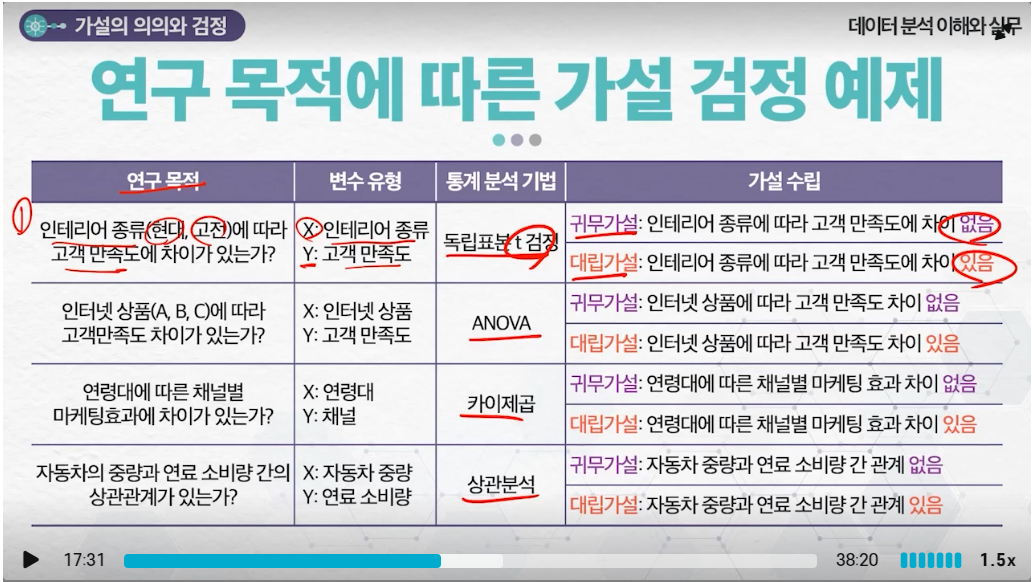

## 5.1 가설검정

### 두 집단 평균 비교 -- 독립 표본 t-test(independent sample t-test)
 - 목적: 독립된 두 표본집단의 평균 차이에 대한 가설검정
 - 예제: 두 웹페이지 A / B 에 대해서 사용자가 머무르는 시간을 기록한 데이터셋에서 두 웹페이지에 머무르는 시간 평균에 차이가 있는지 확인
 
 (note: 마케팅 분야에서 AB테스트 시 두 집단의 평균에 차이가 있는지 검정할때 주로 사용한다)

**귀무가설(H0)**:두 웹페이지 A / B 에 대해서 사용자가 머무르는 시간에 차이가 없다.

**대립가설(H1)**:두 웹페이지 A / B 에 대해서 사용자가 머무르는 시간에 차이가 있다

In [1]:
# 필요 라이브러리 로딩
import numpy as np
import pandas as pd

from scipy import stats # scipy: 수학 , 과학, 공학에 특화된 라이브러리 

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 데이터 셋 로딩 
df = pd.read_csv('D:\KTdata\web_page_data.csv')
# 두 웹페이지 A / B 에 대해서 사용자가 머무르는 시간을 기록한 데이터셋
display(df.head())

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [11]:
# 데이터 셋 셔플링
# df.sample(frac = 1 , random_state = 0)
df= df.sample(frac=1 , random_state= 0).reset_index(drop=True)# frac = 1 (100% 전체 를)  random_state = 0 전부  
df.head()

,Page,Time
0,Page A,0.86
1,Page A,0.95
2,Page A,0.67
3,Page A,2.11
4,Page B,2.46


Boxplot

Text(0.5, 1.0, 'Web_page_stay')

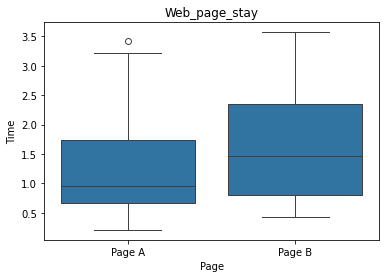

In [12]:
# boxplot 으로 분포 확인 
p = sns.boxplot(x=df['Page'] , y = df['Time'])
p.set_title('Web_page_stay')

## Assumption 1: 독립성
 > 독립변수 그룹은 서로 독립적
 
두개의 집단을 구성하는 구성원이나 구성들이 서로 관계가 없야 함

- 두 웹사이트는 서로 독립적 >> 독립성 만족

## Assumption 2: 정규성 확인 
Shapiro- Wilk 검정을 통해 정규성을 확인


 ** 귀무가설(H0) : 각 독립표본이 정규성을 만족한다 **

 대립가설(H1) : 각 독립표본이 정규성을 만족하지 않는다

In [17]:
# 각 독립 그룹의 분포를 가져옴 
A_stay_time = df.loc[ df['Page'] == 'Page A' , 'Time']
B_stay_time = df.loc[ df['Page'] == 'Page B' , 'Time']
print(A_stay_time)
print(B_stay_time)

0     0.86
1     0.95
2     0.67
3     2.11
5     0.93
6     3.21
7     0.65
8     0.74
10    1.18
12    1.73
14    0.45
15    0.21
16    3.42
18    1.32
22    0.35
24    1.97
27    2.06
28    1.18
30    0.68
34    0.39
35    1.47
Name: Time, dtype: float64
4     2.46
9     0.85
11    0.48
13    2.53
17    0.75
19    0.87
20    3.33
21    0.43
23    0.71
25    2.23
26    3.57
29    1.87
31    1.49
32    1.26
33    1.47
Name: Time, dtype: float64


In [18]:
# 정규성을 만족하는지 확인 
print('A 웹사이트 머무르는 시간 정규성 검정 Shapiro Test : ', stats.shapiro(A_stay_time) )
print('B 웹사이트 머무르는 시간 정규성 검정 Shapiro Test : ', stats.shapiro(B_stay_time) )

A 웹사이트 머무르는 시간 정규성 검정 Shapiro Test :  ShapiroResult(statistic=0.8842321701552288, pvalue=0.01751507607877016)
B 웹사이트 머무르는 시간 정규성 검정 Shapiro Test :  ShapiroResult(statistic=0.9149384800320951, pvalue=0.16119407754094434)


A 와 B 모두 유의확률이 작으므로 귀무가설을 기각 > 대립가설 채택 

즉, A ,B는 정규분포를 따르지 않는다 

## Assumption 3: 등분산성 확인 
F 검정으로 확인

 귀무가설(H0) : 두 독립 표본의 분산은 동일하다 

 대립가설(H1) : 두 독립 표본의 분산은 동일하지 않다

In [19]:
f = np.var(A_stay_time,ddof=1) / np.var(B_stay_time,ddof=1) # 자유도 =1 인 분산
A_size = A_stay_time.size -1
B_size = B_stay_time.size -1

p_value = 1 - stats.f.cdf(f, A_size ,B_size) # f분포의 cdf(누적확률분포)

print("F 통계량 : {}".format(np.round(f,4)))
print("p-value: {}".format(np.round(p_value,4)))

F 통계량 : 0.7651
p-value: 0.715


p-value 값이 유의수준 이상이기에 귀무가설을 기각할 수 없고 채택한다 

 => 두 독립 표본의 분산은 동일하다   

## 독립표본 T 검정

In [20]:
result = stats.ttest_ind(A_stay_time,B_stay_time,equal_var=True)
result

TtestResult(statistic=-1.1237042154424821, pvalue=0.2690102436392604, df=34.0)

In [21]:
# 평균 비교
print("A:{}".format(np.mean(A_stay_time)))
print("B:{}".format(np.mean(B_stay_time)))

A:1.2633333333333332
B:1.62


p-value 값이 유의수준 보다 크므로 귀무가설을 기각하지 못하고 채택

 => 두 웹사이트에서 머무르는 시간에 차이가 없다. 